# Economic Development - Annual entertainment licenses

- This dataset provides insights into annual entertainment licensing in Boston City, with a filtered subset for District 7. The analysis focuses on various dimensions of the licenses to uncover trends, patterns, and disparities between District 7 and Boston City.

## Loading required libraries

In [24]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset for Annual Entertainment licenses into a dataframe

In [27]:
annual_license = pd.read_csv('Annual_entertainment_licenses.csv')

In [29]:
annual_license.head(10)

,license_num,status,license_type,issued,expires,business_name,dba_name,comments,location_comments,applicant,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy
0,CAL-581741,Active,Non-Live Entertainment,NaN,2024-12-31,Starbucks Corporation,Starbucks #80448,1 Entertainment is not permitted outside 2 Noi...,NaN,Ricki Ronallo,Ricki Ronallo,NaN,NaN,500- Boylston ST,Boston,MA,2116,771346.977249,2.953050e+06
1,CAL-581533,Active,Non-Live Entertainment,NaN,2024-12-31,PAG Tremont LLC,Desnuda Cocina & Bar,1 Entertainment is not permitted outside 2 Noi...,NaN,Irakli Gogitidze,Irakli Gogitidze,(857)204-7797,NaN,647- Tremont ST,Roxbury,MA,2118,770948.962953,2.950027e+06
2,CAL-577295,Active,Live Entertainment,NaN,2024-12-31,Dani's Queer Bar LLC,Dani's Queer Bar,1 Live entertainment may be operated seven 7 d...,NaN,Thais Rocha,Thais Rocha,(781)964-8717,NaN,909- Boylston ST,Boston,MA,2115,768534.016339,2.952282e+06
3,CAL-577602,Active,Non-Live Entertainment,NaN,NaN,Biscay LLC,Zurito,1 Entertainment is not permitted outside 2 Noi...,NaN,Nader Asgari-Tari,Nader Asgari-Tari,NaN,NaN,26- Charles ST,Boston,MA,2108,772392.482704,2.955318e+06
4,CAL-578270,Active,Live Entertainment,NaN,NaN,"Iceberg Events, LLC",Titanic: The Artifact Exhibit,Exhibit may be operated Tuesday through Sunday...,NaN,Joseph Gold,Joseph Gold,(617)571-9888,NaN,20- Park PZ,Boston,MA,2116,772703.000127,2.953340e+06
5,CAL-581359,Active,Non-Live Entertainment,2024-11-12,2025-12-31,85 Harvard Ave LLC,Tofu Story,1 Entertainment is not permitted outside 2 Noi...,NaN,Jin Chong,Jin Chong,(617)921-8999,NaN,85- Harvard AV,Allston,MA,2134,755516.893751,2.954053e+06
6,CAL-580155,Active,Live Entertainment,2024-11-04,2025-12-31,P.I.C. ENTERTAINMENT LLC,Broadway Golf Club,1 Entertainment is not permitted outside 2 Noi...,NaN,DANIEL PICARD,DANIEL PICARD,NaN,NaN,417-423C W Broadway,South Boston,MA,2127,778435.136629,2.947973e+06
7,CAL-575965,Active,Non-Live Entertainment,2024-09-24,2024-12-31,"WCH City Place, LLC",Dave's Hot Chicken,1 Entertainment is not permitted outside 2 Noi...,NaN,David Medeiros,David Medeiros,NaN,NaN,123- Stuart ST,Boston,MA,2116,773554.000066,2.953370e+06
8,CAL-575332,Active,Non-Live Entertainment,2024-09-19,2025-12-31,"ANGELA'S CAFE II, INC.",Angela's Cafe II,1 Entertainment is not permitted outside 2 Noi...,NaN,Joel Garcia,Joel Garcia,(617)223-7277,NaN,1012- Bennington ST,East Boston,MA,2128,789540.186925,2.966481e+06
9,CAL-574642,Active,Non-Live Entertainment,2024-09-16,2024-12-31,"CFH 1234 Soldiers Field Road, LLC",Craft Food Halls,1 Entertainment is not permitted outside 2 Noi...,NaN,Eric Gurry,Eric Gurry,NaN,NaN,1234- Soldiers Field RD,Brighton,MA,2134,754437.480556,2.957771e+06


In [31]:
annual_license.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   license_num        1255 non-null   object 
 1   status             1255 non-null   object 
 2   license_type       1255 non-null   object 
 3   issued             1250 non-null   object 
 4   expires            1253 non-null   object 
 5   business_name      1255 non-null   object 
 6   dba_name           1255 non-null   object 
 7   comments           1220 non-null   object 
 8   location_comments  122 non-null    object 
 9   applicant          1255 non-null   object 
 10  manager            1255 non-null   object 
 11  day_phone          798 non-null    object 
 12  evening_phone      77 non-null     object 
 13  address            1255 non-null   object 
 14  city               1255 non-null   object 
 15  state              1255 non-null   object 
 16  zip                1255 

In [33]:
annual_license.info

<bound method DataFrame.info of      license_num  status            license_type      issued     expires  \
0     CAL-581741  Active  Non-Live Entertainment         NaN  2024-12-31   
1     CAL-581533  Active  Non-Live Entertainment         NaN  2024-12-31   
2     CAL-577295  Active      Live Entertainment         NaN  2024-12-31   
3     CAL-577602  Active  Non-Live Entertainment         NaN         NaN   
4     CAL-578270  Active      Live Entertainment         NaN         NaN   
...          ...     ...                     ...         ...         ...   
1250  CAL-132559  Active  Non-Live Entertainment  2014-09-12  2024-12-31   
1251  CAL-133387  Active      Live Entertainment  2014-09-12  2024-12-31   
1252  CAL-132596  Active  Non-Live Entertainment  2014-09-12  2024-12-31   
1253  CAL-132921  Active      Live Entertainment  2014-09-12  2025-12-31   
1254  CAL-132902  Active      Live Entertainment  2014-09-12  2025-12-31   

                      business_name                    

# Measuring the vibrancy of the licensing data

### The function computes the vibrancy score for each city in the dataset. The vibrancy score is calculated using three components:

Active Licenses: The count of licenses with a status of "Active".

License Diversity: The number of unique license types in a city.

Unique DBA(Doing Business As) names: Number of unique businesses that are applying for a license

In [36]:
def calculate_vibrancy(data):
    # Grouping by neighborhood (city) and aggregating data
    data['city_normalized'] = data['city'].str.title()
    vibrancy = (
        data.groupby('city_normalized')
        .agg(
            active_licenses=('status', lambda x: (x == 'Active').sum()),
            license_diversity=('license_type', 'nunique'),
            unique_dba_names=('dba_name', 'nunique')  
        )
        .reset_index()
    )
    
    # Normalizing and creating a composite vibrancy score
    vibrancy['vibrancy_score'] = (
        vibrancy['active_licenses'] +
        vibrancy['license_diversity'] * 2 +  
        vibrancy['unique_dba_names'] * 1.5 
    )
    return vibrancy

vibrancy_data = calculate_vibrancy(annual_license)
vibrancy_data

output_file = 'Annual_licenses_Boston.csv'
vibrancy_data.to_csv(output_file, index=False)

## Plotting the vibrancy score by areas

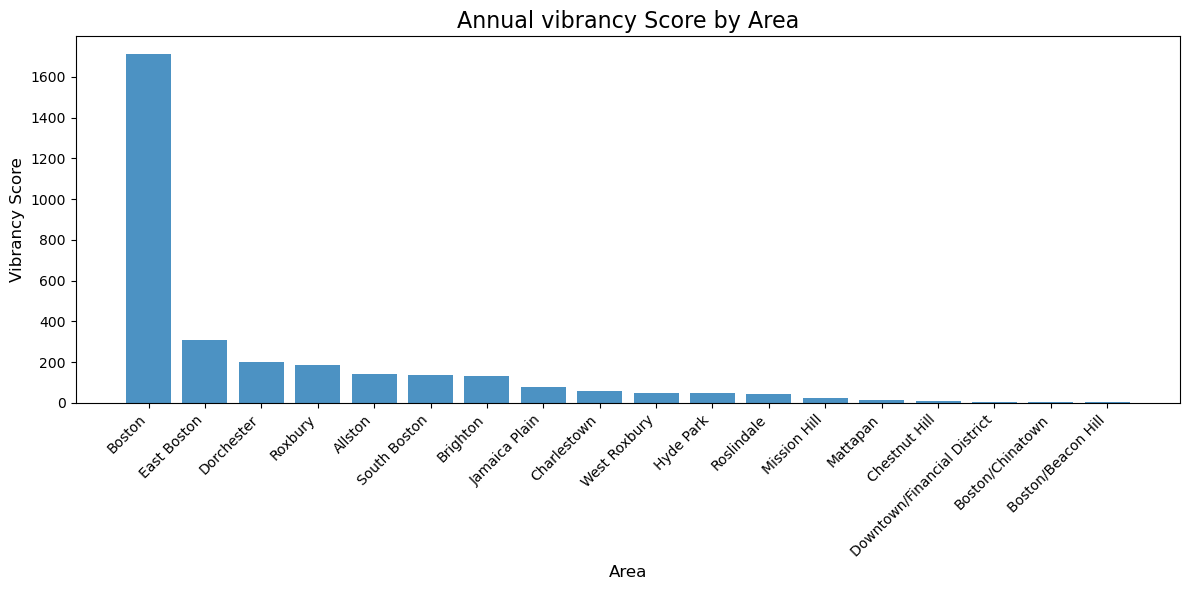

In [39]:
vibrancy_data_sorted = vibrancy_data.sort_values(by='vibrancy_score', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(vibrancy_data_sorted['city_normalized'], vibrancy_data_sorted['vibrancy_score'], alpha=0.8)
plt.title('Annual vibrancy Score by Area', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Vibrancy Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This chart highlights Boston's significant dominance in licensing activity and diversity, as reflected by its high Vibrancy Score. East Boston follows with a notable score, while areas like Roxbury, Jamaica Plain, and East Boston exhibit moderate vibrancy levels. Neighborhoods such as Roslindale, Hyde Park, and Mission Hill show comparatively lower levels of activity and diversity.

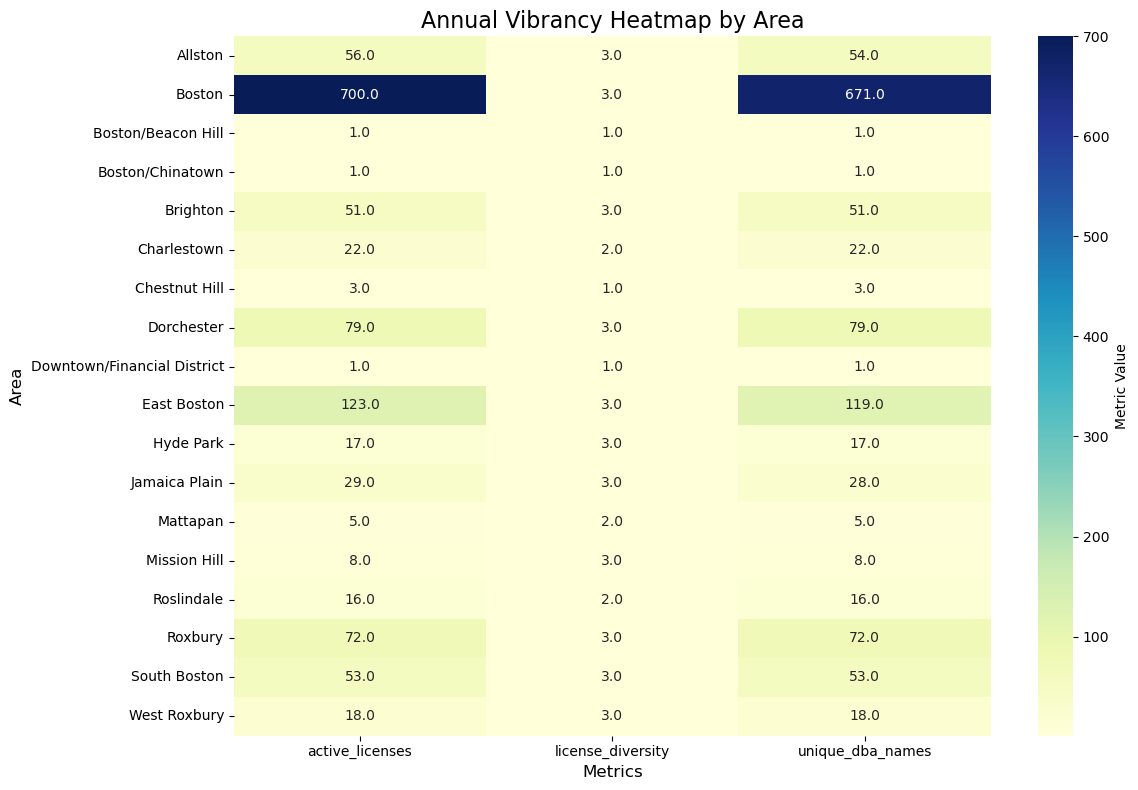

In [63]:
heatmap_data = vibrancy_data.set_index('city_normalized').drop(columns=['vibrancy_score'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Metric Value'}
)
plt.title('Annual Vibrancy Heatmap by Area', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.tight_layout()
plt.show()

The heatmap reveals Boston's dominant position in vibrancy metrics, far surpassing other areas in active licenses, license diversity, and unique DBA names. Dorchester and East Boston show moderate vibrancy, primarily driven by business activity. Other neighborhoods like East Boston, Roxbury, and Jamaica Plain exhibit lower levels of activity and diversity, while some areas, such as Downtown/Financial District and West Roxbury, have minimal or no activity across the metrics.

## Filtering out for only district 7

Using a predefined list of census tract IDs that have been identified by us earlier we are filtering relevant areas from a GeoJSON file containing Boston census tract data. Then, license data is converted into a GeoDataFrame with geometry points derived from GPS coordinates (gpsx, gpsy).The filtered census tracts' CRS is updated to match the license GeoDataFrame's CRS for compatibility. After that a spatial join is performed to associate licenses with the filtered census tracts where they intersect.

In [67]:
import geopandas as gpd
from shapely.geometry import Point

# List of census tracts to filter
census_tracts_list = [
    '25025080601', '25025010403', '25025070700', '25025010300', '25025981100',
    '25025120201', '25025980300', '25025010404', '25025010405', '25025080100',
    '25025120301', '25025071101', '25025091300', '25025010500', '25025110105',
    '25025010206', '25025081301', '25025081302', '25025070502', '25025082100',
    '25025010600', '25025070600', '25025080300', '25025080401', '25025080500',
    '25025080801', '25025080900', '25025081400', '25025081500', '25025081700',
    '25025081800', '25025081900', '25025082000', '25025090100', '25025090200',
    '25025090300', '25025090400', '25025090600', '25025090700', '25025091400',
    '25025092400', '25025070902', '25025070802', '25025070801', '25025070901'
]

boston = gpd.read_file("/Users/harshshah/Desktop/District_7/D7_shapefile.geojson")
boston.head(10)

,geoid20,countyfp20,namelsad20,statefp20,tractce20,intptlat20,name20,funcstat20,intptlon20,mtfcc20,aland20,awater20,objectid,geometry
0,25025140202,025,Census Tract,25,140202,+42.2495181,1402.02,S,-071.1175430,G5020,1538599,17120,1,"POLYGON ((-71.12623 42.24268, -71.12621 42.244..."
1,25025140300,025,Census Tract,25,140300,+42.2587734,1403,S,-071.1188131,G5020,1548879,38736,2,"POLYGON ((-71.13012 42.25118, -71.12961 42.251..."
2,25025140400,025,Census Tract,25,140400,+42.2692219,1404,S,-071.1118088,G5020,1874512,11680,3,"POLYGON ((-71.12491 42.27271, -71.12445 42.273..."
3,25025140106,025,Census Tract,25,140106,+42.2738738,1401.06,S,-071.1371416,G5020,278837,3116,4,"POLYGON ((-71.14069 42.2747, -71.14065 42.2751..."
4,25025110201,025,Census Tract,25,110201,+42.2804960,1102.01,S,-071.1170508,G5020,348208,0,5,"POLYGON ((-71.11999 42.27883, -71.11984 42.279..."
5,25025980700,025,Census Tract,25,980700,+42.2614817,9807,S,-071.1375704,G5020,2888945,53061,6,"POLYGON ((-71.15009 42.26759, -71.14964 42.267..."
6,25025080601,025,Census Tract,25,080601,+42.3333769,806.01,S,-071.0880443,G5020,561665,0,7,"POLYGON ((-71.09535 42.33156, -71.09445 42.332..."
7,25025020200,025,Census Tract,25,020200,+42.3602609,202,S,-071.0685049,G5020,108297,0,8,"POLYGON ((-71.07237 42.36115, -71.07236 42.361..."
8,25025030200,025,Census Tract,25,030200,+42.3646862,302,S,-071.0570125,G5020,58261,0,9,"POLYGON ((-71.05853 42.36696, -71.05835 42.366..."
9,25025030400,025,Census Tract,25,030400,+42.3637112,304,S,-071.0536706,G5020,165170,0,10,"POLYGON ((-71.05629 42.363, -71.05609 42.36326..."


In [69]:
# Filtering `boston` using the list of census tracts
filtered_d7 = boston[boston['geoid20'].isin(census_tracts_list)]  

# Converting License Data to GeoDataFrame
annual_license['geometry'] = annual_license.apply(lambda row: Point(row['gpsx'], row['gpsy']), axis=1)
license_gdf = gpd.GeoDataFrame(annual_license, geometry='geometry', crs="EPSG:2249")
filtered_d7 = filtered_d7.to_crs(license_gdf.crs)

# Spatial Join: Map licenses to the filtered census tracts
filtered_licenses = gpd.sjoin(license_gdf, filtered_d7, how="inner", predicate="intersects")
filtered_d7 = filtered_licenses.drop(columns='geometry')
filtered_d7

,license_num,status,license_type,issued,expires,business_name,dba_name,comments,location_comments,applicant,...,statefp20,tractce20,intptlat20,name20,funcstat20,intptlon20,mtfcc20,aland20,awater20,objectid
1,CAL-581533,Active,Non-Live Entertainment,NaN,2024-12-31,PAG Tremont LLC,Desnuda Cocina & Bar,1 Entertainment is not permitted outside 2 Noi...,NaN,Irakli Gogitidze,...,25,070600,+42.3432581,706,S,-071.0753887,G5020,133036,0,132
10,CAL-570876,Active,Night Club,2024-09-12,2025-12-31,"AMF Bowling Centers, Inc.",Lucky Strike Fenway / Jillian's Billiard Club,1 Live entertainment may be operated seven 7 d...,NaN,Ivy Rose Hudson,...,25,010206,+42.3465040,102.06,S,-071.0942317,G5020,182280,1185,101
19,CAL-571534,Active,Non-Live Entertainment,2024-08-08,2025-12-31,1750 Washington Inc.,Nan Xiang Express,1 Entertainment is not permitted outside 2 Noi...,NaN,Zhexi Pan,...,25,071101,+42.3359523,711.01,S,-071.0727888,G5020,359031,0,75
30,CAL-561377,Active,Non-Live Entertainment,2024-05-03,2024-12-31,"WCH South Bay, LLC",Dave's Hot Chicken,1 Entertainment is not permitted outside 2 sou...,NaN,David Medeiros,...,25,090700,+42.3241150,907,S,-071.0600141,G5020,1073065,0,164
34,CAL-558703,Active,Night Club,2024-04-24,2024-12-31,"General Admission, LLC",Victoria's Diner,1 Live entertainment may be operated seven 7 d...,NaN,Henry Mu,...,25,080100,+42.3293312,801,S,-071.0705295,G5020,1026664,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,CAL-132259,Active,Non-Live Entertainment,2014-09-12,2024-12-31,Flames Restaurant III,Flames Restaurant III,1 ENTERTAINMENT IS NOT PERMITTED OUTSIDE 2 SOU...,NaN,Linval Chambers,...,25,082100,+42.3094485,821,S,-071.0872292,G5020,370577,0,124
1227,CAL-132788,Active,Non-Live Entertainment,2014-09-12,2024-12-31,Northeastern University,Northeastern University Curry Student Centers,1 Entertainment is NOT permitted outside 2 Noi...,NaN,John Matthew Tobin Jr.,...,25,010405,+42.3398656,104.05,S,-071.0895958,G5020,364894,0,51
1232,CAL-132586,Active,Night Club,2014-09-12,2024-12-31,"Hotel Lenox of Boston, L.L.C..",Lenox Hotel,1 INSTRUMENTAL MUSIC IS NOT TO EXCEED EIGHT 8 ...,NaN,Gary Saunders,...,25,010600,+42.3476422,106,S,-071.0793745,G5020,339678,0,130
1241,CAL-132974,Active,Non-Live Entertainment,2014-09-12,2024-12-31,Merengue Corporation,Merengue Restaurant,1 Entertainment is not permitted outside 2 Noi...,NaN,Hector D Pina,...,25,090400,+42.3171635,904,S,-071.0747098,G5020,425139,0,162


In [71]:
filtered_d7.info

<bound method DataFrame.info of      license_num  status            license_type      issued     expires  \
1     CAL-581533  Active  Non-Live Entertainment         NaN  2024-12-31   
10    CAL-570876  Active              Night Club  2024-09-12  2025-12-31   
19    CAL-571534  Active  Non-Live Entertainment  2024-08-08  2025-12-31   
30    CAL-561377  Active  Non-Live Entertainment  2024-05-03  2024-12-31   
34    CAL-558703  Active              Night Club  2024-04-24  2024-12-31   
...          ...     ...                     ...         ...         ...   
1222  CAL-132259  Active  Non-Live Entertainment  2014-09-12  2024-12-31   
1227  CAL-132788  Active  Non-Live Entertainment  2014-09-12  2024-12-31   
1232  CAL-132586  Active              Night Club  2014-09-12  2024-12-31   
1241  CAL-132974  Active  Non-Live Entertainment  2014-09-12  2024-12-31   
1251  CAL-133387  Active      Live Entertainment  2014-09-12  2024-12-31   

                       business_name  \
1              

In [73]:
filtered_d7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 1251
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   license_num        182 non-null    object 
 1   status             182 non-null    object 
 2   license_type       182 non-null    object 
 3   issued             181 non-null    object 
 4   expires            182 non-null    object 
 5   business_name      182 non-null    object 
 6   dba_name           182 non-null    object 
 7   comments           182 non-null    object 
 8   location_comments  18 non-null     object 
 9   applicant          182 non-null    object 
 10  manager            182 non-null    object 
 11  day_phone          116 non-null    object 
 12  evening_phone      10 non-null     object 
 13  address            182 non-null    object 
 14  city               182 non-null    object 
 15  state              182 non-null    object 
 16  zip                182 non-nul

In [75]:
vibrancy_data_d7 = calculate_vibrancy(filtered_d7)
vibrancy_data_d7

output_file = 'Annual_licenses_D7.csv'
vibrancy_data_d7.to_csv(output_file, index=False)

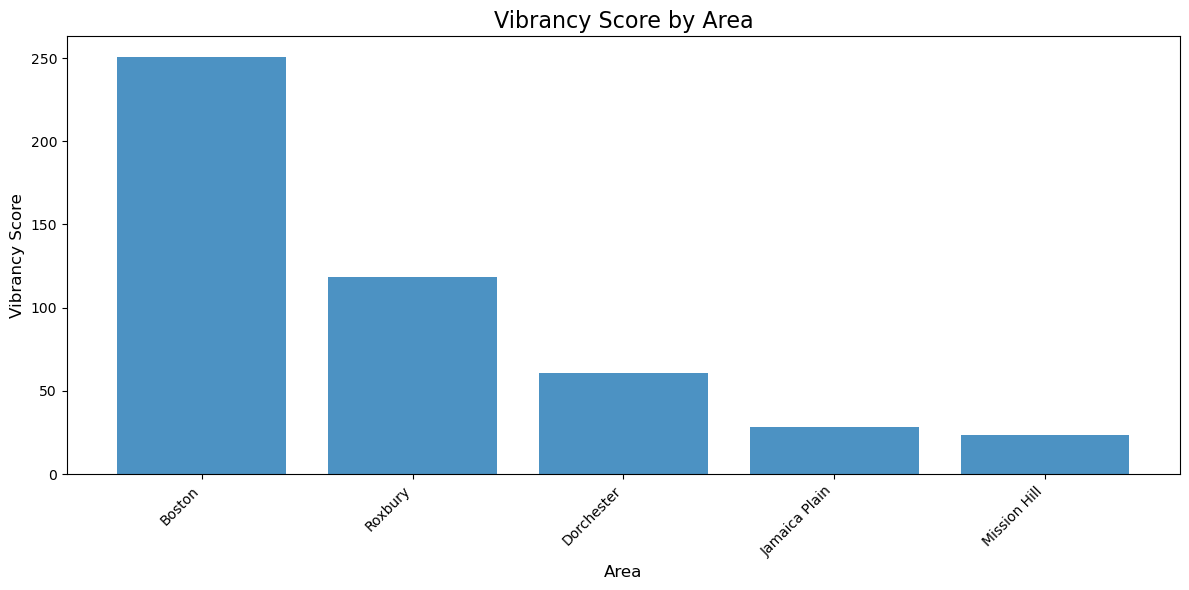

In [77]:
vibrancy_data_sorted = vibrancy_data_d7.sort_values(by='vibrancy_score', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(vibrancy_data_sorted['city_normalized'], vibrancy_data_sorted['vibrancy_score'], alpha=0.8)
plt.title('Vibrancy Score by Area', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Vibrancy Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart illustrates the varying levels of vibrancy across District 7 neighborhoods. Boston leads with the highest Vibrancy Score, signifying robust business activity and diversity. Roxbury and Dorchester exhibit moderate scores, suggesting a notable level of activity. In contrast, Jamaica Plain and Mission Hill have lower scores, reflecting less intensive economic and cultural activity.


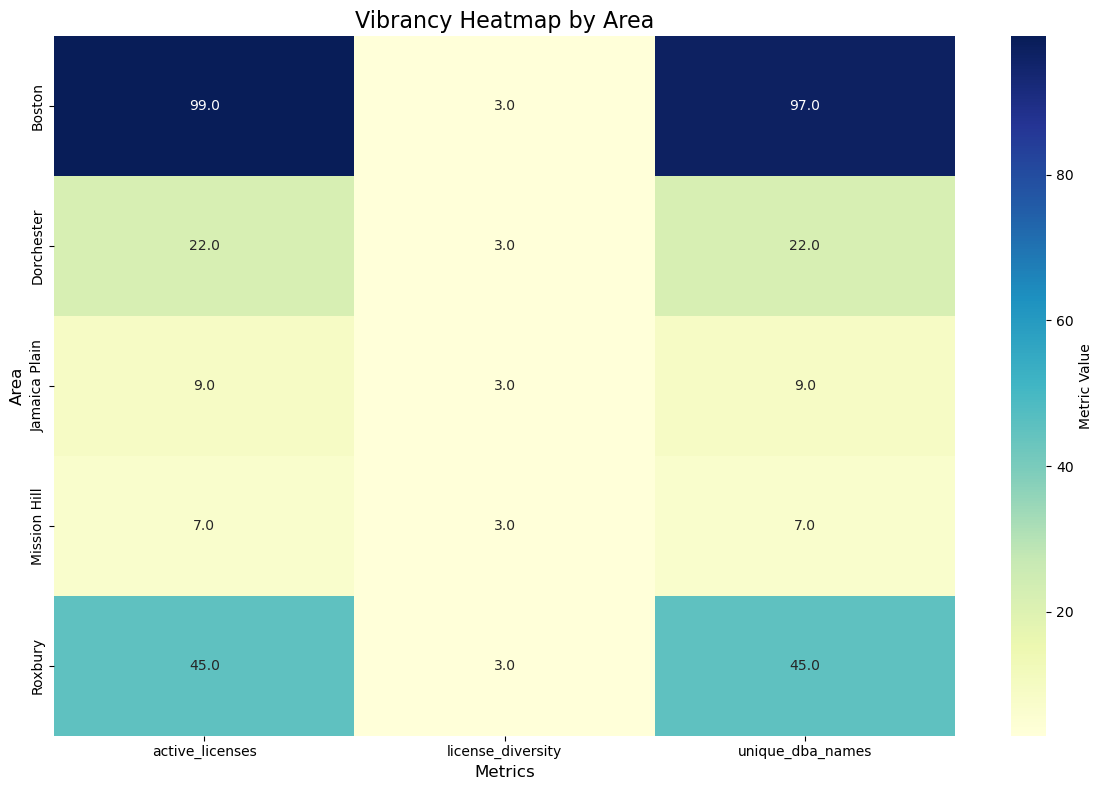

In [59]:
heatmap_data = vibrancy_data_d7.set_index('city_normalized').drop(columns=['vibrancy_score'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Metric Value'}
)
plt.title('Vibrancy Heatmap by Area', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.tight_layout()
plt.show()

The heatmap provides a visual comparison of vibrancy metrics across District 7 neighborhoods. Boston significantly outperforms other areas, with the highest vibrancy score driven by a high number of unique business names. Roxbury exhibits significant vibrancy, with notable levels of active licenses and unique business names. Dorchester shows moderate levels of activity, while Jamaica Plain and Mission Hill have lower levels of activity and diversity across all metrics.